# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ahmad Fadli Ramadhan
- **Email:** m206d4ky1811@bangkit.academy
- **ID Dicoding:** ahmadfadly95

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: **Apakah ada parameter kualitas udara yang memiliki hubungan dengan parameter kualitas udara lainnya berdasarkan data di stasiun pemantauan Dingling?**

- Pertanyaan 2: **Bagaimana pengaruh curah hujan terhadap parameter NO2 di stasiun pemantauan Dingling?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Di antara banyaknya data `.csv` yang ada, saya hanya ingin mengambil data dari stasiun Dingling. Adapun cara saya untuk melakukannya adalah sebagai berikut.

Saya ingin menyimpan hasil baca data ke dataframe bernama `df`.

In [2]:
df = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')

Lihat preview dari data yang telah dibaca menggunakan method `head()`.

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Adapun berdasarkan dari website [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data), deskripsi mengenai dataset tersebut adalah sebagai berikut:
- **No**: Nomor baris
- **year**: Tahun data pada baris ini
- **month**: Bulan data pada baris ini
- **day**: Hari data pada baris ini
- **hour**: Jam data pada baris ini
- **PM2.5**: Konsentrasi PM2.5 (μg/m³)
- **PM10**: Konsentrasi PM10 (μg/m³)
- **SO2**: Konsentrasi SO2 (μg/m³)
- **NO2**: Konsentrasi NO2 (μg/m³)
- **CO**: Konsentrasi CO (μg/m³)
- **O3**: Konsentrasi O3 (μg/m³)
- **TEMP**: Suhu (derajat Celsius)
- **PRES**: Tekanan (hPa)
- **DEWP**: Titik embun (derajat Celsius)
- **RAIN**: Curah hujan (mm)
- **wd**: Arah angin
- **WSPM**: Kecepatan angin (m/s)
- **station**: Nama situs pemantauan kualitas udara


### Assessing Data

Untuk memahami data yang akan diolah, ada baiknya melihat detail dan struktur data menggunakan method `info()` dan `describe()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Selanjutnya, beberapa hal yang dilakukan berdasarkan detail dan struktur data di atas yang mungkin menjadi masalah adalah sebagai berikut.

#### Mengecek **missing values**.

Terlihat bahwa angka **Non-Null** konstan berada di 420,768 data pada beberapa kolom, kecuali kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan kolom `WSPM`. Artinya ada data **null** pada kolom tersebut. Adapun detail banyak data yang kosong pada semua kolom dapat menggunakan method `isna()` kemudian dijumlahkan dengan `sum()`.

In [6]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Ayo lihat baris data yang memiliki data kosong.

In [7]:
df[df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
10,11,2013,3,1,10,8.0,NaN,3.0,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34884,34885,2017,2,21,12,62.0,62.0,NaN,53.0,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling
34933,34934,2017,2,23,13,6.0,6.0,4.0,2.0,200.0,NaN,6.6,1018.8,-14.2,0.0,WNW,4.7,Dingling
35055,35056,2017,2,28,15,16.0,27.0,6.0,NaN,400.0,88.0,15.6,1007.6,-12.8,0.0,WNW,3.2,Dingling


#### Mengecek **invalid value**.

Tipe data dari tiap kolom saya rasa sudah cocok, namun sepertinya terdapat **outliers** atau kesalahan pengukuran pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `03` berdasarkan rentang nilai **max** dan **min** nya.

#### Mengecek **duplicate data**

In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak ada data yang duplikat.

### Cleaning Data

Berdasarkan hasil identifikasi masalah sebelumnya, berikut adalah beberapa hal yang dilakukan untuk membersihkannya. 

#### Data dengan anomali pada value nya

In [9]:
df.sort_values(by='PM2.5', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25777,25778,2016,2,8,1,881.0,NaN,156.0,49.0,1100.0,20.0,-1.5,1005.4,-16.1,0.0,NNE,1.3,Dingling
24716,24717,2015,12,25,20,647.0,737.0,15.0,153.0,9400.0,2.0,-2.8,1007.4,-4.4,0.0,ENE,0.9,Dingling
24714,24715,2015,12,25,18,632.0,771.0,11.0,175.0,8700.0,2.0,-2.0,1007.6,-4.0,0.0,ESE,1.6,Dingling
24715,24716,2015,12,25,19,617.0,720.0,11.0,156.0,9000.0,2.0,-2.4,1007.5,-4.3,0.0,SE,0.7,Dingling
24713,24714,2015,12,25,17,614.0,734.0,10.0,186.0,8200.0,2.0,-1.8,1007.2,-4.0,0.0,SSE,1.1,Dingling


In [10]:
df.sort_values(by='PM10', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
17355,17356,2015,2,22,3,144.0,905.0,2.0,2.0,1800.0,81.0,-5.0,1017.0,-25.7,0.0,WNW,7.0,Dingling
17352,17353,2015,2,22,0,80.0,904.0,2.0,2.0,1800.0,86.0,-4.0,1013.0,-26.9,0.0,NW,5.7,Dingling
9153,9154,2014,3,17,9,189.0,895.0,54.0,37.0,1100.0,44.0,16.5,1002.3,-6.6,0.0,WSW,3.0,Dingling
25778,25779,2016,2,8,2,610.0,864.0,82.0,40.0,1200.0,24.0,-2.4,1004.5,-15.5,0.0,ESE,0.7,Dingling
17351,17352,2015,2,21,23,59.0,842.0,2.0,2.0,1800.0,86.0,-2.0,1014.0,-25.3,0.0,WNW,7.5,Dingling


In [11]:
df.sort_values(by='SO2', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25777,25778,2016,2,8,1,881.0,NaN,156.0,49.0,1100.0,20.0,-1.5,1005.4,-16.1,0.0,NNE,1.3,Dingling
15896,15897,2014,12,23,8,64.0,79.0,150.0,57.0,1200.0,2.0,0.2,1029.0,-14.2,0.0,S,1.2,Dingling
7889,7890,2014,1,23,17,228.0,285.0,145.0,116.0,3000.0,8.0,1.9,1004.6,-12.3,0.0,E,1.0,Dingling
8630,8631,2014,2,23,14,251.0,255.0,141.0,77.0,3700.0,12.0,3.1,1020.2,-3.9,0.0,WSW,1.0,Dingling
8631,8632,2014,2,23,15,260.0,271.0,137.0,77.0,3700.0,14.0,3.1,1020.1,-3.9,0.0,S,1.0,Dingling


In [12]:
df.sort_values(by='NO2', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33398,33399,2016,12,21,14,493.0,493.0,25.0000,205.0000,8500.0,11.0000,3.8,1014.2,-3.0,0.0,SSW,1.2,Dingling
5921,5922,2013,11,2,17,305.0,325.0,20.5632,190.3131,NaN,20.3490,10.9,1011.9,6.8,0.0,SSE,1.2,Dingling
33661,33662,2017,1,1,13,536.0,536.0,29.0000,190.0000,6400.0,16.0000,1.1,1014.7,-8.4,0.0,N,0.8,Dingling
33399,33400,2016,12,21,15,445.0,445.0,20.0000,188.0000,7300.0,12.0000,3.9,1014.4,-3.4,0.0,SW,1.2,Dingling
5922,5923,2013,11,2,18,271.0,293.0,9.7104,187.0283,NaN,1.7136,9.8,1012.1,6.7,0.0,SSE,0.0,Dingling


In [13]:
df.sort_values(by='CO', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33746,33747,2017,1,5,2,413.0,418.0,6.0,126.0,10000.0,2.0,-2.0,1020.7,-2.7,0.0,NNW,1.3,Dingling
33745,33746,2017,1,5,1,393.0,423.0,7.0,128.0,9600.0,3.0,-2.0,1020.2,-2.7,0.0,ESE,1.2,Dingling
24716,24717,2015,12,25,20,647.0,737.0,15.0,153.0,9400.0,2.0,-2.8,1007.4,-4.4,0.0,ENE,0.9,Dingling
33386,33387,2016,12,21,2,435.0,435.0,13.0,131.0,9400.0,3.0,-1.0,1020.0,-2.9,0.0,SE,1.2,Dingling
24717,24718,2015,12,25,21,604.0,699.0,14.0,154.0,9100.0,2.0,-3.0,1007.5,-4.4,0.0,ESE,1.4,Dingling


In [14]:
df.sort_values(by='O3', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
29258,29259,2016,7,2,2,10.0,11.0,2.0,3.0,200.0,500.0,22.0,995.3,12.8,0.0,NE,1.0,Dingling
29256,29257,2016,7,2,0,11.0,11.0,2.0,3.0,200.0,500.0,22.1,995.2,13.4,0.0,N,1.6,Dingling
28311,28312,2016,5,23,15,104.0,183.0,2.0,41.0,700.0,500.0,17.4,999.0,15.7,4.3,W,3.7,Dingling
33542,33543,2016,12,27,14,19.0,34.0,13.0,3.0,200.0,500.0,2.3,1024.4,-16.2,0.0,NW,4.7,Dingling
29270,29271,2016,7,2,14,19.0,34.0,3.0,17.0,400.0,500.0,33.4,994.8,14.0,0.0,SSE,2.8,Dingling


Berdasarkan data-data yang diurutkan dari nilai tertinggi di atas, terlihat bahwa sepertinya angka `max` bukan merupakan **outliners**, karena angka nya menurun secara perlahan, kecuali untuk `PM2.5`, sehingga perlu di-replace dengan data terdekatnya.

In [15]:
df['PM2.5'].replace(df['PM2.5'].max(), 647.0, inplace=True)
df.sort_values(by='PM2.5', ascending=False).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24716,24717,2015,12,25,20,647.0,737.0,15.0,153.0,9400.0,2.0,-2.8,1007.4,-4.4,0.0,ENE,0.9,Dingling
25777,25778,2016,2,8,1,647.0,NaN,156.0,49.0,1100.0,20.0,-1.5,1005.4,-16.1,0.0,NNE,1.3,Dingling
24714,24715,2015,12,25,18,632.0,771.0,11.0,175.0,8700.0,2.0,-2.0,1007.6,-4.0,0.0,ESE,1.6,Dingling
24715,24716,2015,12,25,19,617.0,720.0,11.0,156.0,9000.0,2.0,-2.4,1007.5,-4.3,0.0,SE,0.7,Dingling
24713,24714,2015,12,25,17,614.0,734.0,10.0,186.0,8200.0,2.0,-1.8,1007.2,-4.0,0.0,SSE,1.1,Dingling


#### Data dengan missing value

In [16]:
print("Total data:", df.shape[0])
print("Total nilai yang hilang:", df.isna().sum().sum())

Total data: 35064
Total nilai yang hilang: 7015


Jumlah data yang hilang adalah sekitar 20%, sehingga perlu dipertimbangkan untuk di-drop. Namun, karena dominan yang hilang adalah data polusi dan tidak bisa lakukan imputasi, maka akan di-drop.

In [17]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31306 entries, 2 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31306 non-null  int64  
 1   year     31306 non-null  int64  
 2   month    31306 non-null  int64  
 3   day      31306 non-null  int64  
 4   hour     31306 non-null  int64  
 5   PM2.5    31306 non-null  float64
 6   PM10     31306 non-null  float64
 7   SO2      31306 non-null  float64
 8   NO2      31306 non-null  float64
 9   CO       31306 non-null  float64
 10  O3       31306 non-null  float64
 11  TEMP     31306 non-null  float64
 12  PRES     31306 non-null  float64
 13  DEWP     31306 non-null  float64
 14  RAIN     31306 non-null  float64
 15  wd       31306 non-null  object 
 16  WSPM     31306 non-null  float64
 17  station  31306 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.5+ MB


## Exploratory Data Analysis (EDA)

### Explore df_combined

Karena yang akan dianalisis adalah kolom tertentu, maka buat dataframe baru untuk menampung kolom yang terpilih saja.

In [18]:
df_selected = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN']]

In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31306 entries, 2 to 35063
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   31306 non-null  float64
 1   PM10    31306 non-null  float64
 2   SO2     31306 non-null  float64
 3   NO2     31306 non-null  float64
 4   CO      31306 non-null  float64
 5   O3      31306 non-null  float64
 6   RAIN    31306 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


In [20]:
df_selected.head()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
2,5.0,5.0,3.0,2.0,200.0,79.0,0.0
5,6.0,6.0,3.0,4.0,200.0,79.0,0.0
6,5.0,10.0,3.0,4.0,200.0,77.0,0.0
7,5.0,6.0,3.0,2.0,200.0,80.0,0.0
8,8.0,7.0,3.0,3.0,200.0,79.0,0.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

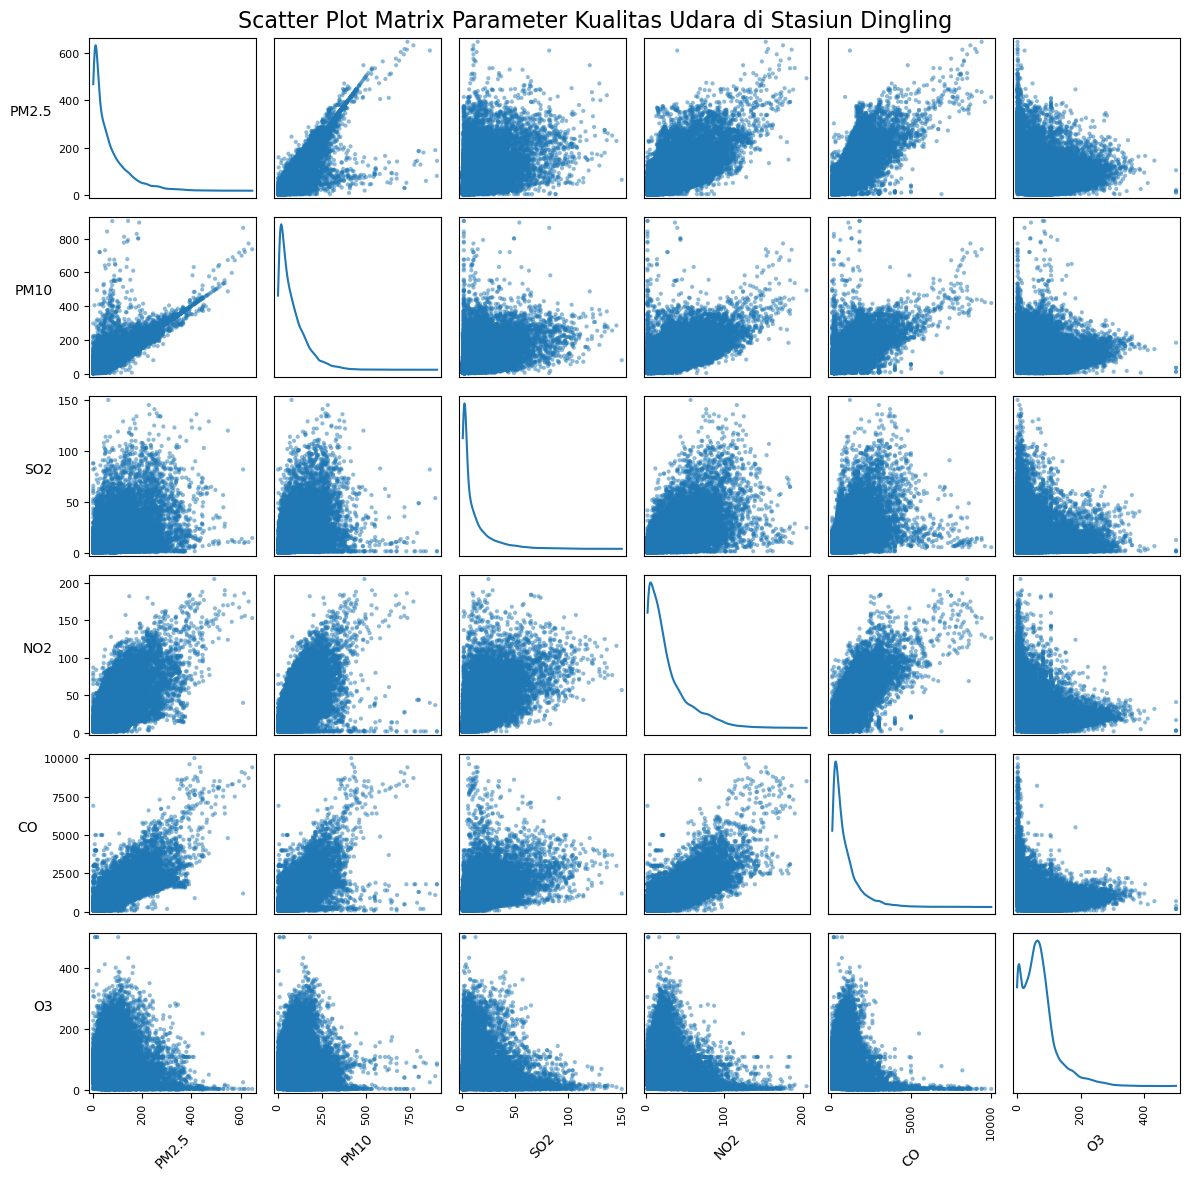

In [21]:
scatter_data = df_selected[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
scatter_matrix = pd.plotting.scatter_matrix(scatter_data, figsize=(12, 12), diagonal='kde')

for i in range(len(scatter_data.columns)):
    for j in range(len(scatter_data.columns)):
        ax = scatter_matrix[i, j]
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
        ax.xaxis.label.set_size(10)
        ax.yaxis.label.set_size(10)

plt.suptitle('Scatter Plot Matrix Parameter Kualitas Udara di Stasiun Dingling', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi scatter matriks di atas, terdapat beberapa pasangan parameter yang memiliki pola dan persebarannya tidak menyebar luas (seperti membentuk garis atau kumpulan yang padat), yaitu `PM2.5` - `PM10` dan `NO2` - `CO`.

### Pertanyaan 2:

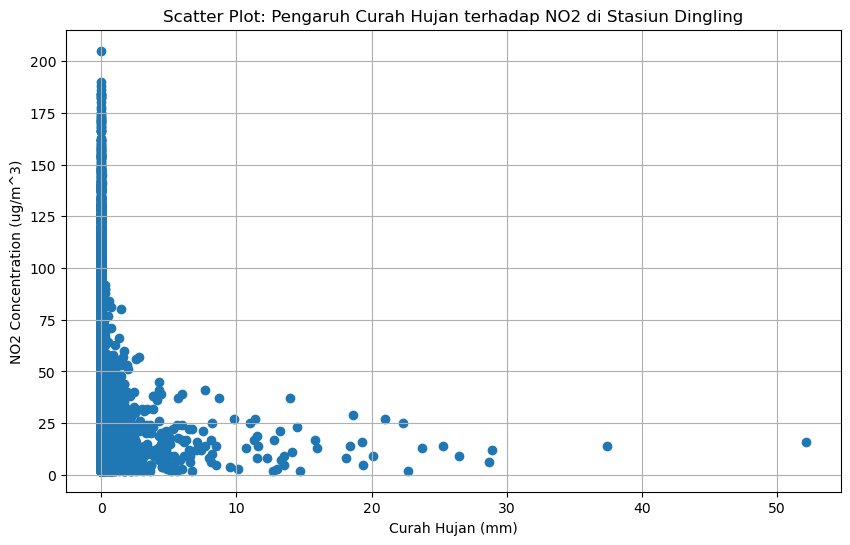

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RAIN'], df['NO2'])

plt.xlabel('Curah Hujan (mm)')
plt.ylabel('NO2 Concentration (ug/m^3)')
plt.title('Scatter Plot: Pengaruh Curah Hujan terhadap NO2 di Stasiun Dingling')

plt.grid(True)
plt.show()

Berdasarkan scatter plot di atas, hubungan antara curah hujan dan konsentrasi NO2 adalah semakin rendah curah hujannya, semakin besar jangkauan atau rentang nilai NO2. Semakin tinggi curah hujan, semakin rendah konsentrasi NO2.

## Conclusion

- Conclution pertanyaan 1:

Parameter kualitas udara yang mungkin memiliki korelasi adalah `PM2.5` - `PM10` dan `NO2` - `CO`.

- Conclution pertanyaan 2:

Tingkat curah hujan mempengaruhi tingkat konsentrasi `NO2` di kota Dingling.